<div style = 'text-align:center'>

## Tarea 1 - Curso introductorio de Machine Learning en ``Python``.
### Datos personales del desarrollador:
Nombre: José Gabriel López Madrid 

Correo: ``jglopezmad@gmail.com``
</div>

<div style= "text-align:justify">

Los datos que se presentan en el siguiente trabajo son datos resultantes de un análisis químico de 178 vinos cultivados durante la década de 1970 dentro de la misma región italiana. El análisis determinó los siguientes 13 parámetros:
</div>

<p style = "text-align:center">

| n  | Variable       | Descripción                   |
|----|----------------|-------------------------------|
| 0  | Alcohol        | Alcohol                       |
| 1  | MalicAcid      | Ácido Málico                  |
| 2  | Ash            | Cenizas                       |
| 3  | AlcAsh         | Alcalinidad de las cenizas    |
| 4  | Mg             | Magnesio                      |
| 5  | Phenols        | Fenoles Totales               |
| 6  | Flav           | Flavonoides                   |
| 7  | NonFlavPhenols | Fenoles no flavonoides        |
| 8  | Proa           | Proantocianinas               |
| 9  | Color          | Intensidad de color           |
| 10 | Hue            | Tono                          |
| 11 | OD             | OD280/OD315 de vinos diluidos |
| 12 | Proline        | Prolina                       |

</p>

<div style = "text-align:justify">

Lo primero a resolver es la lectura de los archivos ``wine.text`` y ``wine.train``, por lo que en la siguiente celda del cuaderno se procede a mostrar la lectura de ambos archivos. Usando celdas posteriores, se ilustra la tabla que ambos archivos contienen dentro. En este caso, aprovecho el poder de la librería ``pandas`` para poder crear las tablas _on the fly_.
</div>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#Coloco algunas opciones para el uso de Matplotlib, nada más porque me gusta el output usando LaTeX, aunque
#para ver el output correctamente, dejaré comentadas algunas líneas nada más para aquellos que necesiten 
#correrlo desde Google Colab.

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Source Code Pro"
})

#Se leen ambos archivos y se procede a guardar las variables de dichos archivos en las variables siguientes.
#Previo a realizar el análisis de datos, me dí a la tarea de convertir los archivos a .csv debido a que
#suelo usar el formato .csv con mayor regularidad en mi trabajo. Luego utilizo la ventaja de pandas para
#crear tablas usando las opciones .to_markdown()
df1 = pd.read_csv("./wine.test - wine.test.csv")
df2 = pd.read_csv("./wine.train - wine.train.csv")
#print(df1.to_markdown()) 
#print(df2.to_markdown())
#Genero ambas tablas en formato markdown para poder mostrarlas en el cuaderno, una vez generadas, no es nece
#sario generalas de nuevo, comento las líneas para ser explícito con respecto a la forma en la que se genera
#ron dichas tablas. 

<div style = 'text-align:justify'>

La tabla perteneciente al archivo ``wine.train`` se muestra a continuación. De nuevo, con el módulo de ``pandas``, se logró crear la tabla, _on the fly_, por lo que no tuve que hacer la tabla en Markdown desde cero. 
</div>

|     |   Alcohol |   MalicAcid |   Ash |   AlcAsh |   Mg |   Phenols |   Flav |   NonFlavPhenols |   Proa |   Color |   Hue |   OD |   Proline |   classdigit | class      |
|----:|----------:|------------:|------:|---------:|-----:|----------:|-------:|-----------------:|-------:|--------:|------:|-----:|----------:|-------------:|:-----------|
|   0 |     13.17 |        5.19 |  2.32 |     22   |   93 |      1.74 |   0.63 |             0.61 |   1.55 |    7.9  |  0.6  | 1.48 |       725 |            3 | Barbera    |
|   1 |     11.62 |        1.99 |  2.28 |     18   |   98 |      3.02 |   2.26 |             0.17 |   1.35 |    3.25 |  1.16 | 2.96 |       345 |            2 | Grignolino |
|   2 |     12    |        3.43 |  2    |     19   |   87 |      2    |   1.64 |             0.37 |   1.87 |    1.28 |  0.93 | 3.05 |       564 |            2 | Grignolino |
|   3 |     13.17 |        2.59 |  2.37 |     20   |  120 |      1.65 |   0.68 |             0.53 |   1.46 |    9.3  |  0.6  | 1.62 |       840 |            3 | Barbera    |
|   4 |     12.07 |        2.16 |  2.17 |     21   |   85 |      2.6  |   2.65 |             0.37 |   1.35 |    2.76 |  0.86 | 3.28 |       378 |            2 | Grignolino |
|   5 |     12.7  |        3.55 |  2.36 |     21.5 |  106 |      1.7  |   1.2  |             0.17 |   0.84 |    5    |  0.78 | 1.29 |       600 |            3 | Barbera    |
|   6 |     12.93 |        3.8  |  2.65 |     18.6 |  102 |      2.41 |   2.41 |             0.25 |   1.98 |    4.5  |  1.03 | 3.52 |       770 |            1 | Barolo     |
|   7 |     14.19 |        1.59 |  2.48 |     16.5 |  108 |      3.3  |   3.93 |             0.32 |   1.86 |    8.7  |  1.23 | 2.82 |      1680 |            1 | Barolo     |
|   8 |     13.4  |        3.91 |  2.48 |     23   |  102 |      1.8  |   0.75 |             0.43 |   1.41 |    7.3  |  0.7  | 1.56 |       750 |            3 | Barbera    |
|   9 |     13.83 |        1.57 |  2.62 |     20   |  115 |      2.95 |   3.4  |             0.4  |   1.72 |    6.6  |  1.13 | 2.57 |      1130 |            1 | Barolo     |
|  10 |     11.84 |        0.89 |  2.58 |     18   |   94 |      2.2  |   2.21 |             0.22 |   2.35 |    3.05 |  0.79 | 3.08 |       520 |            2 | Grignolino |
|  11 |     13.51 |        1.8  |  2.65 |     19   |  110 |      2.35 |   2.53 |             0.29 |   1.54 |    4.2  |  1.1  | 2.87 |      1095 |            1 | Barolo     |
|  12 |     13.07 |        1.5  |  2.1  |     15.5 |   98 |      2.4  |   2.64 |             0.28 |   1.37 |    3.7  |  1.18 | 2.69 |      1020 |            1 | Barolo     |
|  13 |     12.43 |        1.53 |  2.29 |     21.5 |   86 |      2.74 |   3.15 |             0.39 |   1.77 |    3.94 |  0.69 | 2.84 |       352 |            2 | Grignolino |
|  14 |     12.08 |        2.08 |  1.7  |     17.5 |   97 |      2.23 |   2.17 |             0.26 |   1.4  |    3.3  |  1.27 | 2.96 |       710 |            2 | Grignolino |
|  15 |     12.81 |        2.31 |  2.4  |     24   |   98 |      1.15 |   1.09 |             0.27 |   0.83 |    5.7  |  0.66 | 1.36 |       560 |            3 | Barbera    |
|  16 |     12.47 |        1.52 |  2.2  |     19   |  162 |      2.5  |   2.27 |             0.32 |   3.28 |    2.6  |  1.16 | 2.63 |       937 |            2 | Grignolino |
|  17 |     13.11 |        1.01 |  1.7  |     15   |   78 |      2.98 |   3.18 |             0.26 |   2.28 |    5.3  |  1.12 | 3.18 |       502 |            2 | Grignolino |
|  18 |     12.64 |        1.36 |  2.02 |     16.8 |  100 |      2.02 |   1.41 |             0.53 |   0.62 |    5.75 |  0.98 | 1.59 |       450 |            2 | Grignolino |
|  19 |     12.29 |        2.83 |  2.22 |     18   |   88 |      2.45 |   2.25 |             0.25 |   1.99 |    2.15 |  1.15 | 3.3  |       290 |            2 | Grignolino |
|  20 |     14.3  |        1.92 |  2.72 |     20   |  120 |      2.8  |   3.14 |             0.33 |   1.97 |    6.2  |  1.07 | 2.65 |      1280 |            1 | Barolo     |
|  21 |     14.22 |        3.99 |  2.51 |     13.2 |  128 |      3    |   3.04 |             0.2  |   2.08 |    5.1  |  0.89 | 3.53 |       760 |            1 | Barolo     |
|  22 |     13.05 |        3.86 |  2.32 |     22.5 |   85 |      1.65 |   1.59 |             0.61 |   1.62 |    4.8  |  0.84 | 2.01 |       515 |            2 | Grignolino |
|  23 |     11.96 |        1.09 |  2.3  |     21   |  101 |      3.38 |   2.14 |             0.13 |   1.65 |    3.21 |  0.99 | 3.13 |       886 |            2 | Grignolino |
|  24 |     13.49 |        1.66 |  2.24 |     24   |   87 |      1.88 |   1.84 |             0.27 |   1.03 |    3.74 |  0.98 | 2.78 |       472 |            2 | Grignolino |
|  25 |     14.1  |        2.02 |  2.4  |     18.8 |  103 |      2.75 |   2.92 |             0.32 |   2.38 |    6.2  |  1.07 | 2.75 |      1060 |            1 | Barolo     |
|  26 |     14.2  |        1.76 |  2.45 |     15.2 |  112 |      3.27 |   3.39 |             0.34 |   1.97 |    6.75 |  1.05 | 2.85 |      1450 |            1 | Barolo     |
|  27 |     13.5  |        3.12 |  2.62 |     24   |  123 |      1.4  |   1.57 |             0.22 |   1.25 |    8.6  |  0.59 | 1.3  |       500 |            3 | Barbera    |
|  28 |     12.77 |        2.39 |  2.28 |     19.5 |   86 |      1.39 |   0.51 |             0.48 |   0.64 |    9.9  |  0.57 | 1.63 |       470 |            3 | Barbera    |
|  29 |     13.64 |        3.1  |  2.56 |     15.2 |  116 |      2.7  |   3.03 |             0.17 |   1.66 |    5.1  |  0.96 | 3.36 |       845 |            1 | Barolo     |
|  30 |     12.93 |        2.81 |  2.7  |     21   |   96 |      1.54 |   0.5  |             0.53 |   0.75 |    4.6  |  0.77 | 2.31 |       600 |            3 | Barbera    |
|  31 |     14.06 |        1.63 |  2.28 |     16   |  126 |      3    |   3.17 |             0.24 |   2.1  |    5.65 |  1.09 | 3.71 |       780 |            1 | Barolo     |
|  32 |     13.24 |        2.59 |  2.87 |     21   |  118 |      2.8  |   2.69 |             0.39 |   1.82 |    4.32 |  1.04 | 2.93 |       735 |            1 | Barolo     |
|  33 |     12.42 |        2.55 |  2.27 |     22   |   90 |      1.68 |   1.84 |             0.66 |   1.42 |    2.7  |  0.86 | 3.3  |       315 |            2 | Grignolino |
|  34 |     13.5  |        1.81 |  2.61 |     20   |   96 |      2.53 |   2.61 |             0.28 |   1.66 |    3.52 |  1.12 | 3.82 |       845 |            1 | Barolo     |
|  35 |     11.03 |        1.51 |  2.2  |     21.5 |   85 |      2.46 |   2.17 |             0.52 |   2.01 |    1.9  |  1.71 | 2.87 |       407 |            2 | Grignolino |
|  36 |     12.42 |        4.43 |  2.73 |     26.5 |  102 |      2.2  |   2.13 |             0.43 |   1.71 |    2.08 |  0.92 | 3.12 |       365 |            2 | Grignolino |
|  37 |     12.6  |        2.46 |  2.2  |     18.5 |   94 |      1.62 |   0.66 |             0.63 |   0.94 |    7.1  |  0.73 | 1.58 |       695 |            3 | Barbera    |
|  38 |     13.29 |        1.97 |  2.68 |     16.8 |  102 |      3    |   3.23 |             0.31 |   1.66 |    6    |  1.07 | 2.84 |      1270 |            1 | Barolo     |
|  39 |     14.75 |        1.73 |  2.39 |     11.4 |   91 |      3.1  |   3.69 |             0.43 |   2.81 |    5.4  |  1.25 | 2.73 |      1150 |            1 | Barolo     |
|  40 |     13.62 |        4.95 |  2.35 |     20   |   92 |      2    |   0.8  |             0.47 |   1.02 |    4.4  |  0.91 | 2.05 |       550 |            3 | Barbera    |
|  41 |     11.65 |        1.67 |  2.62 |     26   |   88 |      1.92 |   1.61 |             0.4  |   1.34 |    2.6  |  1.36 | 3.21 |       562 |            2 | Grignolino |
|  42 |     14.06 |        2.15 |  2.61 |     17.6 |  121 |      2.6  |   2.51 |             0.31 |   1.25 |    5.05 |  1.06 | 3.58 |      1295 |            1 | Barolo     |
|  43 |     13.56 |        1.73 |  2.46 |     20.5 |  116 |      2.96 |   2.78 |             0.2  |   2.45 |    6.25 |  0.98 | 3.03 |      1120 |            1 | Barolo     |
|  44 |     12.25 |        1.73 |  2.12 |     19   |   80 |      1.65 |   2.03 |             0.37 |   1.63 |    3.4  |  1    | 3.17 |       510 |            2 | Grignolino |
|  45 |     12.6  |        1.34 |  1.9  |     18.5 |   88 |      1.45 |   1.36 |             0.29 |   1.35 |    2.45 |  1.04 | 2.77 |       562 |            2 | Grignolino |
|  46 |     11.87 |        4.31 |  2.39 |     21   |   82 |      2.86 |   3.03 |             0.21 |   2.91 |    2.8  |  0.75 | 3.64 |       380 |            2 | Grignolino |
|  47 |     13.2  |        1.78 |  2.14 |     11.2 |  100 |      2.65 |   2.76 |             0.26 |   1.28 |    4.38 |  1.05 | 3.4  |      1050 |            1 | Barolo     |
|  48 |     13.48 |        1.67 |  2.64 |     22.5 |   89 |      2.6  |   1.1  |             0.52 |   2.29 |   11.75 |  0.57 | 1.78 |       620 |            3 | Barbera    |
|  49 |     11.56 |        2.05 |  3.23 |     28.5 |  119 |      3.18 |   5.08 |             0.47 |   1.87 |    6    |  0.93 | 3.69 |       465 |            2 | Grignolino |
|  50 |     12.29 |        3.17 |  2.21 |     18   |   88 |      2.85 |   2.99 |             0.45 |   2.81 |    2.3  |  1.42 | 2.83 |       406 |            2 | Grignolino |
|  51 |     12.72 |        1.75 |  2.28 |     22.5 |   84 |      1.38 |   1.76 |             0.48 |   1.63 |    3.3  |  0.88 | 2.42 |       488 |            2 | Grignolino |
|  52 |     12.17 |        1.45 |  2.53 |     19   |  104 |      1.89 |   1.75 |             0.45 |   1.03 |    2.95 |  1.45 | 2.23 |       355 |            2 | Grignolino |
|  53 |     12.37 |        1.63 |  2.3  |     24.5 |   88 |      2.22 |   2.45 |             0.4  |   1.9  |    2.12 |  0.89 | 2.78 |       342 |            2 | Grignolino |
|  54 |     13.32 |        3.24 |  2.38 |     21.5 |   92 |      1.93 |   0.76 |             0.45 |   1.25 |    8.42 |  0.55 | 1.62 |       650 |            3 | Barbera    |
|  55 |     12.87 |        4.61 |  2.48 |     21.5 |   86 |      1.7  |   0.65 |             0.47 |   0.86 |    7.65 |  0.54 | 1.86 |       625 |            3 | Barbera    |
|  56 |     14.83 |        1.64 |  2.17 |     14   |   97 |      2.8  |   2.98 |             0.29 |   1.98 |    5.2  |  1.08 | 2.85 |      1045 |            1 | Barolo     |
|  57 |     13.52 |        3.17 |  2.72 |     23.5 |   97 |      1.55 |   0.52 |             0.5  |   0.55 |    4.35 |  0.89 | 2.06 |       520 |            3 | Barbera    |
|  58 |     13.84 |        4.12 |  2.38 |     19.5 |   89 |      1.8  |   0.83 |             0.48 |   1.56 |    9.01 |  0.57 | 1.64 |       480 |            3 | Barbera    |
|  59 |     12.99 |        1.67 |  2.6  |     30   |  139 |      3.3  |   2.89 |             0.21 |   1.96 |    3.35 |  1.31 | 3.5  |       985 |            2 | Grignolino |
|  60 |     13.56 |        1.71 |  2.31 |     16.2 |  117 |      3.15 |   3.29 |             0.34 |   2.34 |    6.13 |  0.95 | 3.38 |       795 |            1 | Barolo     |
|  61 |     12.51 |        1.24 |  2.25 |     17.5 |   85 |      2    |   0.58 |             0.6  |   1.25 |    5.45 |  0.75 | 1.51 |       650 |            3 | Barbera    |
|  62 |     12.25 |        4.72 |  2.54 |     21   |   89 |      1.38 |   0.47 |             0.53 |   0.8  |    3.85 |  0.75 | 1.27 |       720 |            3 | Barbera    |
|  63 |     12.51 |        1.73 |  1.98 |     20.5 |   85 |      2.2  |   1.92 |             0.32 |   1.48 |    2.94 |  1.04 | 3.57 |       672 |            2 | Grignolino |
|  64 |     13.4  |        4.6  |  2.86 |     25   |  112 |      1.98 |   0.96 |             0.27 |   1.11 |    8.5  |  0.67 | 1.92 |       630 |            3 | Barbera    |
|  65 |     13.82 |        1.75 |  2.42 |     14   |  111 |      3.88 |   3.74 |             0.32 |   1.87 |    7.05 |  1.01 | 3.26 |      1190 |            1 | Barolo     |
|  66 |     13.45 |        3.7  |  2.6  |     23   |  111 |      1.7  |   0.92 |             0.43 |   1.46 |   10.68 |  0.85 | 1.56 |       695 |            3 | Barbera    |
|  67 |     11.81 |        2.12 |  2.74 |     21.5 |  134 |      1.6  |   0.99 |             0.14 |   1.56 |    2.5  |  0.95 | 2.26 |       625 |            2 | Grignolino |
|  68 |     12.82 |        3.37 |  2.3  |     19.5 |   88 |      1.48 |   0.66 |             0.4  |   0.97 |   10.26 |  0.72 | 1.75 |       685 |            3 | Barbera    |
|  69 |     13.73 |        4.36 |  2.26 |     22.5 |   88 |      1.28 |   0.47 |             0.52 |   1.15 |    6.62 |  0.78 | 1.75 |       520 |            3 | Barbera    |
|  70 |     13.71 |        5.65 |  2.45 |     20.5 |   95 |      1.68 |   0.61 |             0.52 |   1.06 |    7.7  |  0.64 | 1.74 |       740 |            3 | Barbera    |
|  71 |     12.08 |        1.83 |  2.32 |     18.5 |   81 |      1.6  |   1.5  |             0.52 |   1.64 |    2.4  |  1.08 | 2.27 |       480 |            2 | Grignolino |
|  72 |     14.39 |        1.87 |  2.45 |     14.6 |   96 |      2.5  |   2.52 |             0.3  |   1.98 |    5.25 |  1.02 | 3.58 |      1290 |            1 | Barolo     |
|  73 |     12.21 |        1.19 |  1.75 |     16.8 |  151 |      1.85 |   1.28 |             0.14 |   2.5  |    2.85 |  1.28 | 3.07 |       718 |            2 | Grignolino |
|  74 |     11.76 |        2.68 |  2.92 |     20   |  103 |      1.75 |   2.03 |             0.6  |   1.05 |    3.8  |  1.23 | 2.5  |       607 |            2 | Grignolino |
|  75 |     12.36 |        3.83 |  2.38 |     21   |   88 |      2.3  |   0.92 |             0.5  |   1.04 |    7.65 |  0.56 | 1.58 |       520 |            3 | Barbera    |
|  76 |     14.13 |        4.1  |  2.74 |     24.5 |   96 |      2.05 |   0.76 |             0.56 |   1.35 |    9.2  |  0.61 | 1.6  |       560 |            3 | Barbera    |
|  77 |     13.67 |        1.25 |  1.92 |     18   |   94 |      2.1  |   1.79 |             0.32 |   0.73 |    3.8  |  1.23 | 2.46 |       630 |            2 | Grignolino |
|  78 |     11.82 |        1.72 |  1.88 |     19.5 |   86 |      2.5  |   1.64 |             0.37 |   1.42 |    2.06 |  0.94 | 2.44 |       415 |            2 | Grignolino |
|  79 |     13.08 |        3.9  |  2.36 |     21.5 |  113 |      1.41 |   1.39 |             0.34 |   1.14 |    9.4  |  0.57 | 1.33 |       550 |            3 | Barbera    |
|  80 |     13.72 |        1.43 |  2.5  |     16.7 |  108 |      3.4  |   3.67 |             0.19 |   2.04 |    6.8  |  0.89 | 2.87 |      1285 |            1 | Barolo     |
|  81 |     11.79 |        2.13 |  2.78 |     28.5 |   92 |      2.13 |   2.24 |             0.58 |   1.76 |    3    |  0.97 | 2.44 |       466 |            2 | Grignolino |
|  82 |     13.68 |        1.83 |  2.36 |     17.2 |  104 |      2.42 |   2.69 |             0.42 |   1.97 |    3.84 |  1.23 | 2.87 |       990 |            1 | Barolo     |
|  83 |     13.87 |        1.9  |  2.8  |     19.4 |  107 |      2.95 |   2.97 |             0.37 |   1.76 |    4.5  |  1.25 | 3.4  |       915 |            1 | Barolo     |
|  84 |     13.05 |        1.65 |  2.55 |     18   |   98 |      2.45 |   2.43 |             0.29 |   1.44 |    4.25 |  1.12 | 2.51 |      1105 |            1 | Barolo     |
|  85 |     14.37 |        1.95 |  2.5  |     16.8 |  113 |      3.85 |   3.49 |             0.24 |   2.18 |    7.8  |  0.86 | 3.45 |      1480 |            1 | Barolo     |
|  86 |     12.08 |        1.13 |  2.51 |     24   |   78 |      2    |   1.58 |             0.4  |   1.4  |    2.2  |  1.31 | 2.72 |       630 |            2 | Grignolino |
|  87 |     12.25 |        3.88 |  2.2  |     18.5 |  112 |      1.38 |   0.78 |             0.29 |   1.14 |    8.21 |  0.65 | 2    |       855 |            3 | Barbera    |
|  88 |     12.37 |        1.13 |  2.16 |     19   |   87 |      3.5  |   3.1  |             0.19 |   1.87 |    4.45 |  1.22 | 2.87 |       420 |            2 | Grignolino |
|  89 |     13.77 |        1.9  |  2.68 |     17.1 |  115 |      3    |   2.79 |             0.39 |   1.68 |    6.3  |  1.13 | 2.93 |      1375 |            1 | Barolo     |
|  90 |     12.86 |        1.35 |  2.32 |     18   |  122 |      1.51 |   1.25 |             0.21 |   0.94 |    4.1  |  0.76 | 1.29 |       630 |            3 | Barbera    |
|  91 |     13.3  |        1.72 |  2.14 |     17   |   94 |      2.4  |   2.19 |             0.27 |   1.35 |    3.95 |  1.02 | 2.77 |      1285 |            1 | Barolo     |
|  92 |     12.29 |        1.41 |  1.98 |     16   |   85 |      2.55 |   2.5  |             0.29 |   1.77 |    2.9  |  1.23 | 2.74 |       428 |            2 | Grignolino |
|  93 |     12.04 |        4.3  |  2.38 |     22   |   80 |      2.1  |   1.75 |             0.42 |   1.35 |    2.6  |  0.79 | 2.57 |       580 |            2 | Grignolino |
|  94 |     13.49 |        3.59 |  2.19 |     19.5 |   88 |      1.62 |   0.48 |             0.58 |   0.88 |    5.7  |  0.81 | 1.82 |       580 |            3 | Barbera    |
|  95 |     13.69 |        3.26 |  2.54 |     20   |  107 |      1.83 |   0.56 |             0.5  |   0.8  |    5.88 |  0.96 | 1.82 |       680 |            3 | Barbera    |
|  96 |     12.69 |        1.53 |  2.26 |     20.7 |   80 |      1.38 |   1.46 |             0.58 |   1.62 |    3.05 |  0.96 | 2.06 |       495 |            2 | Grignolino |
|  97 |     13.05 |        1.73 |  2.04 |     12.4 |   92 |      2.72 |   3.27 |             0.17 |   2.91 |    7.2  |  1.12 | 2.91 |      1150 |            1 | Barolo     |
|  98 |     13.71 |        1.86 |  2.36 |     16.6 |  101 |      2.61 |   2.88 |             0.27 |   1.69 |    3.8  |  1.11 | 4    |      1035 |            1 | Barolo     |
|  99 |     12.84 |        2.96 |  2.61 |     24   |  101 |      2.32 |   0.6  |             0.53 |   0.81 |    4.92 |  0.89 | 2.15 |       590 |            3 | Barbera    |
| 100 |     13.94 |        1.73 |  2.27 |     17.4 |  108 |      2.88 |   3.54 |             0.32 |   2.08 |    8.9  |  1.12 | 3.1  |      1260 |            1 | Barolo     |
| 101 |     14.02 |        1.68 |  2.21 |     16   |   96 |      2.65 |   2.33 |             0.26 |   1.98 |    4.7  |  1.04 | 3.59 |      1035 |            1 | Barolo     |
| 102 |     13.03 |        0.9  |  1.71 |     16   |   86 |      1.95 |   2.03 |             0.24 |   1.46 |    4.6  |  1.19 | 2.48 |       392 |            2 | Grignolino |
| 103 |     12.37 |        1.21 |  2.56 |     18.1 |   98 |      2.42 |   2.65 |             0.37 |   2.08 |    4.6  |  1.19 | 2.3  |       678 |            2 | Grignolino |
| 104 |     12.72 |        1.81 |  2.2  |     18.8 |   86 |      2.2  |   2.53 |             0.26 |   1.77 |    3.9  |  1.16 | 3.14 |       714 |            2 | Grignolino |
| 105 |     12.2  |        3.03 |  2.32 |     19   |   96 |      1.25 |   0.49 |             0.4  |   0.73 |    5.5  |  0.66 | 1.83 |       510 |            3 | Barbera    |
| 106 |     13.05 |        2.05 |  3.22 |     25   |  124 |      2.63 |   2.68 |             0.47 |   1.92 |    3.58 |  1.13 | 3.2  |       830 |            1 | Barolo     |
| 107 |     12    |        1.51 |  2.42 |     22   |   86 |      1.45 |   1.25 |             0.5  |   1.63 |    3.6  |  1.05 | 2.65 |       450 |            2 | Grignolino |
| 108 |     13.76 |        1.53 |  2.7  |     19.5 |  132 |      2.95 |   2.74 |             0.5  |   1.35 |    5.4  |  1.25 | 3    |      1235 |            1 | Barolo     |
| 109 |     13.78 |        2.76 |  2.3  |     22   |   90 |      1.35 |   0.68 |             0.41 |   1.03 |    9.58 |  0.7  | 1.68 |       615 |            3 | Barbera    |
| 110 |     13.28 |        1.64 |  2.84 |     15.5 |  110 |      2.6  |   2.68 |             0.34 |   1.36 |    4.6  |  1.09 | 2.78 |       880 |            1 | Barolo     |
| 111 |     13.58 |        1.66 |  2.36 |     19.1 |  106 |      2.86 |   3.19 |             0.22 |   1.95 |    6.9  |  1.09 | 2.88 |      1515 |            1 | Barolo     |
| 112 |     11.82 |        1.47 |  1.99 |     20.8 |   86 |      1.98 |   1.6  |             0.3  |   1.53 |    1.95 |  0.95 | 3.33 |       495 |            2 | Grignolino |
| 113 |     12.53 |        5.51 |  2.64 |     25   |   96 |      1.79 |   0.6  |             0.63 |   1.1  |    5    |  0.82 | 1.69 |       515 |            3 | Barbera    |
| 114 |     14.34 |        1.68 |  2.7  |     25   |   98 |      2.8  |   1.31 |             0.53 |   2.7  |   13    |  0.57 | 1.96 |       660 |            3 | Barbera    |
| 115 |     11.61 |        1.35 |  2.7  |     20   |   94 |      2.74 |   2.92 |             0.29 |   2.49 |    2.65 |  0.96 | 3.26 |       680 |            2 | Grignolino |
| 116 |     12.7  |        3.87 |  2.4  |     23   |  101 |      2.83 |   2.55 |             0.43 |   1.95 |    2.57 |  1.19 | 3.13 |       463 |            2 | Grignolino |
| 117 |     13.63 |        1.81 |  2.7  |     17.2 |  112 |      2.85 |   2.91 |             0.3  |   1.46 |    7.3  |  1.28 | 2.88 |      1310 |            1 | Barolo     |


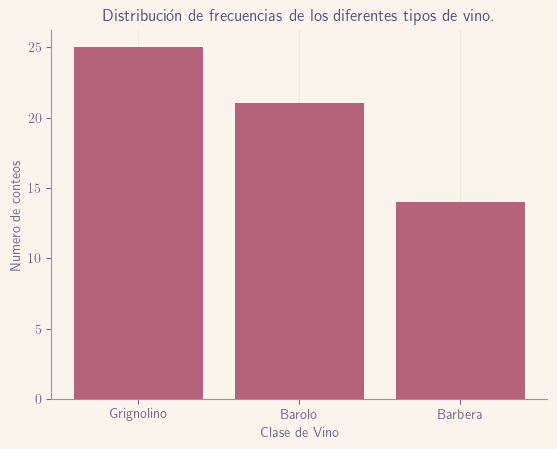

In [2]:
#Crear los vectores para el gráfico
clases = df1['class']
frecuencias = clases.value_counts()

#Gráfico y opciones de tema y formato para hacer un gráfico con valor estético.
plt.style.use("https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle")
plt.bar(frecuencias.index,frecuencias)
plt.grid()
plt.xlabel("Clase de Vino")
plt.ylabel("Numero de conteos")
plt.title('Distribución de frecuencias de los diferentes tipos de vino.')
plt.show()

<div style = 'text-align:justify'>

Considerando el gráfico anterior, me parece que los diferentes tipos de cultivo de vino tienen frecuencias distintas, siendo que el ``Grignolino`` aparece muchas más veces en la muestra, mientras que en segundo y tercer lugar se encuentran el ``Barolo`` y el ``Barbera``, respectivamente. A pesar de esto, el ``Grignolino`` y el ``Barolo`` no distan mucho el uno del otro. 
</div>